# 1. 데이터 불러오기

In [1]:
import os
os.chdir('C:/Users/hu612/Desktop/School/수DA쟁이/Project/개인과제/data')

In [2]:
import pandas as pd
import numpy as np

train=pd.read_csv('train_features.csv')
train_labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_features.csv')
submission=pd.read_csv('sample_submission.csv')

# 2. TRAIN TEST 안나눈 GRU

In [3]:
import tensorflow as tf
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
X.shape

TensorShape([3125, 600, 6])

In [4]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

In [5]:
from keras.models import Sequential
from keras.layers import GRU,Dense

np.random.seed(0)
model = Sequential()
model.add(GRU(32, input_shape=(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Dense(61,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 32)                3840      
_________________________________________________________________
dense (Dense)                (None, 128)               4224      
_________________________________________________________________
dense_1 (Dense)              (None, 61)                7869      
Total params: 15,933
Trainable params: 15,933
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(X,y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
20/20 [==============================] - 6s 232ms/step - loss: 3.8123 - accuracy: 0.2388 - val_loss: 3.0938 - val_accuracy: 0.4976
Epoch 2/30
20/20 [==============================] - 5s 274ms/step - loss: 2.9700 - accuracy: 0.4815 - val_loss: 2.8329 - val_accuracy: 0.4976
Epoch 3/30
20/20 [==============================] - 5s 276ms/step - loss: 2.7607 - accuracy: 0.4861 - val_loss: 2.7547 - val_accuracy: 0.4976
Epoch 4/30
20/20 [==============================] - 5s 241ms/step - loss: 2.7264 - accuracy: 0.4739 - val_loss: 2.7030 - val_accuracy: 0.4976
Epoch 5/30
20/20 [==============================] - 4s 218ms/step - loss: 2.6430 - accuracy: 0.4780 - val_loss: 2.6620 - val_accuracy: 0.4976
Epoch 6/30
20/20 [==============================] - 5s 266ms/step - loss: 2.5600 - accuracy: 0.4802 - val_loss: 2.6267 - val_accuracy: 0.4976
Epoch 7/30
20/20 [==============================] - 5s 239ms/step - loss: 2.4827 - accuracy: 0.4925 - val_loss: 2.5917 - val_accuracy: 0.4976
Epoch 

In [7]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [8]:
pred=model.predict(test_X)

In [9]:
submission.iloc[:,1:]=pred

In [11]:
# 2는 loss 잘못씀 ㅜㅜ loss = mse 씀 ㅠㅠ
submission.to_csv('C:/Users/hu612/Desktop/School/수DA쟁이/Project/개인과제/data/GRU/2.csv', index=False)

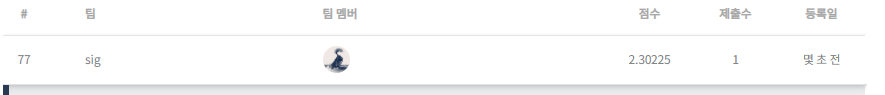

# 3. TRAIN TEST 나누고 GRU

In [12]:
X_train = train[(train['id']>= 0) & (train['id']<=2499)]
X_test = train[train['id'] >= 2500]
X_train = tf.reshape(np.array(X_train.iloc[:,2:]),[-1, 600, 6])
X_test = tf.reshape(np.array(X_test.iloc[:,2:]),[-1, 600, 6])

from tensorflow.keras.utils import to_categorical
y =  train_labels['label']
slice_arr = slice(0,2500,1)
y_train = y[slice_arr]

slice_arr2 = slice(2500,3125,1)
y_test = y[slice_arr2]

y_train_encoding = tf.keras.utils.to_categorical(y_train)
y_test_encoding = tf.keras.utils.to_categorical(y_test)

In [13]:
# op= adam,loss mse 했을때 정확도 0 나옴
from keras.models import Sequential

np.random.seed(0)
model = Sequential()
model.add(GRU(32, input_shape=(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Dense(61,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                3840      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_3 (Dense)              (None, 61)                7869      
Total params: 15,933
Trainable params: 15,933
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train,y_train_encoding
          , epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
16/16 [==============================] - 5s 228ms/step - loss: 3.7998 - accuracy: 0.2112 - val_loss: 3.1531 - val_accuracy: 0.4860
Epoch 2/30
16/16 [==============================] - 3s 195ms/step - loss: 2.9508 - accuracy: 0.4904 - val_loss: 2.8653 - val_accuracy: 0.4860
Epoch 3/30
16/16 [==============================] - 3s 193ms/step - loss: 2.7399 - accuracy: 0.4826 - val_loss: 2.8077 - val_accuracy: 0.4860
Epoch 4/30
16/16 [==============================] - 4s 242ms/step - loss: 2.6345 - accuracy: 0.4894 - val_loss: 2.7769 - val_accuracy: 0.4860
Epoch 5/30
16/16 [==============================] - 4s 240ms/step - loss: 2.6049 - accuracy: 0.4805 - val_loss: 2.7498 - val_accuracy: 0.4860
Epoch 6/30
16/16 [==============================] - 4s 222ms/step - loss: 2.5469 - accuracy: 0.4838 - val_loss: 2.7296 - val_accuracy: 0.4860
Epoch 7/30
16/16 [==============================] - 3s 211ms/step - loss: 2.4981 - accuracy: 0.4825 - val_loss: 2.7058 - val_accuracy: 0.4860
Epoch 

In [17]:
y_pred = model.predict(X_test)

In [19]:
y_pred

array([[2.7831304e-03, 7.1614504e-02, 6.2628021e-04, ..., 1.2219404e-02,
        1.1954797e-02, 1.1184431e-03],
       [4.9454818e-04, 9.5045520e-03, 2.1014386e-03, ..., 3.1917156e-03,
        2.5755318e-02, 8.2267274e-05],
       [1.7561435e-03, 3.8862461e-04, 8.0141028e-05, ..., 2.9006258e-03,
        2.3187153e-05, 1.4574178e-02],
       ...,
       [3.3204665e-03, 2.4898939e-03, 4.5917515e-04, ..., 1.5955841e-03,
        5.3737108e-03, 6.3912472e-04],
       [4.6581967e-04, 7.1380258e-04, 1.2797501e-03, ..., 4.9869488e-03,
        2.3960820e-03, 1.3146970e-03],
       [1.1586443e-03, 1.0310503e-03, 7.8314357e-02, ..., 2.6440227e-03,
        4.0025387e-02, 5.2704237e-04]], dtype=float32)

In [21]:
y_pred1 = list(y_pred)
for a in range(0,625,1) :
    for i in range(0,61,1) :
        if (i == np.argmax(y_pred1[a])) : 
            y_pred1[a][i] = 1
        else :
            y_pred1[a][i] = 0

In [22]:
y_pred1

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1

In [23]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred1 == y_test_encoding)))

테스트 세트의 정확도: 0.98


In [24]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [25]:
prediction=model.predict(test_X)

In [26]:
submission.iloc[:,1:]=prediction

In [27]:
submission.to_csv('C:/Users/hu612/Desktop/School/수DA쟁이/Project/개인과제/data/GRU/3.csv', index=False)

# 4. 층추가

In [28]:
from keras.models import Sequential
from keras.layers import GRU,Dense, Dropout

np.random.seed(0)
model = Sequential()
model.add(GRU(500, input_shape=(600,6)))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(350, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(61,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 500)               762000    
_________________________________________________________________
dense_4 (Dense)              (None, 1500)              751500    
_________________________________________________________________
dropout (Dropout)            (None, 1500)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 350)               525350    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               35100     
_________________________________________________________________
dense_7 (Dense)              (None, 61)                6161      
Total params: 2,080,111
Trainable params: 2,080,111
Non-trainable params: 0
____________________________________________

In [30]:
history = model.fit(X_train,y_train_encoding
          , epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
63/63 [==============================] - 164s 3s/step - loss: 2.9745 - accuracy: 0.4740 - val_loss: 2.7140 - val_accuracy: 0.4860
Epoch 2/30
63/63 [==============================] - 164s 3s/step - loss: 2.6379 - accuracy: 0.4770 - val_loss: 2.6065 - val_accuracy: 0.4880
Epoch 3/30
63/63 [==============================] - 167s 3s/step - loss: 2.4409 - accuracy: 0.4845 - val_loss: 2.4783 - val_accuracy: 0.4940
Epoch 4/30
63/63 [==============================] - 161s 3s/step - loss: 2.1690 - accuracy: 0.4975 - val_loss: 2.4410 - val_accuracy: 0.5100
Epoch 5/30
63/63 [==============================] - 161s 3s/step - loss: 1.9220 - accuracy: 0.5335 - val_loss: 2.4748 - val_accuracy: 0.5240
Epoch 6/30
63/63 [==============================] - 162s 3s/step - loss: 1.6862 - accuracy: 0.5595 - val_loss: 2.6038 - val_accuracy: 0.4520
Epoch 7/30
63/63 [==============================] - 158s 3s/step - loss: 1.4354 - accuracy: 0.5980 - val_loss: 2.5130 - val_accuracy: 0.5020
Epoch 8/30
63

In [31]:
y_pred = model.predict(X_test)
y_pred1 = list(y_pred)
for a in range(0,625,1) :
    for i in range(0,61,1) :
        if (i == np.argmax(y_pred1[a])) : 
            y_pred1[a][i] = 1
        else :
            y_pred1[a][i] = 0

In [32]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred1 == y_test_encoding)))

테스트 세트의 정확도: 0.98


In [33]:
y_pred1

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1

In [34]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [36]:
prediction=model.predict(test_X)

In [37]:
submission.iloc[:,1:]=prediction

In [38]:
submission.to_csv('C:/Users/hu612/Desktop/School/수DA쟁이/Project/개인과제/data/GRU/4.csv', index=False)

# 2 :  2.3022
# 3 : 2.4705
# 4 : 5.9345

In [39]:
X_train = train[(train['id']>= 0) & (train['id']<=2499)]
X_test = train[train['id'] >= 2500]
X_train = tf.reshape(np.array(X_train.iloc[:,2:]),[-1, 600, 6])
X_test = tf.reshape(np.array(X_test.iloc[:,2:]),[-1, 600, 6])

from tensorflow.keras.utils import to_categorical
y =  train_labels['label']
slice_arr = slice(0,2500,1)
y_train = y[slice_arr]

slice_arr2 = slice(2500,3125,1)
y_test = y[slice_arr2]

y_train_encoding = tf.keras.utils.to_categorical(y_train)
y_test_encoding = tf.keras.utils.to_categorical(y_test)

In [43]:
# op= adam,loss mse 했을때 정확도 0 나옴
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

np.random.seed(0)
model = Sequential()
model.add(GRU(32, input_shape=(600,6)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(61,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 32)                3840      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
flatten (Flatten)            (None, 64)               

In [44]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [45]:
history = model.fit(X_train, y_train_encoding, epochs = 30, validation_split=0.2, callbacks=[es, mc])

Epoch 1/30
63/63 [==============================] - 25s 321ms/step - loss: 3.5987 - accuracy: 0.2897 - val_loss: 3.0783 - val_accuracy: 0.4860
Epoch 2/30
63/63 [==============================] - 22s 346ms/step - loss: 3.0513 - accuracy: 0.5024 - val_loss: 3.0717 - val_accuracy: 0.4860
Epoch 3/30
63/63 [==============================] - 20s 314ms/step - loss: 2.9849 - accuracy: 0.4961 - val_loss: 3.0769 - val_accuracy: 0.4860
Epoch 4/30
63/63 [==============================] - 21s 328ms/step - loss: 2.9920 - accuracy: 0.4824 - val_loss: 3.0884 - val_accuracy: 0.4860
Epoch 5/30
63/63 [==============================] - 22s 349ms/step - loss: 2.9137 - accuracy: 0.4883 - val_loss: 3.0738 - val_accuracy: 0.4860
Epoch 00005: early stopping


In [46]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test_encoding)[1]))

20/20 [==============================] - 1s 24ms/step - loss: 2.4338 - acc: 0.5296

 테스트 정확도: 0.5296


In [47]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [48]:
pred=model.predict(test_X)

In [49]:
submission.iloc[:,1:]=pred

In [50]:
submission.to_csv('C:/Users/hu612/Desktop/School/수DA쟁이/Project/개인과제/data/GRU/GRU3.csv', index=False)